# Eda Practice 2

KETERANGAN KOLOM:
1. Month = Bulan
2. Sales = Penjualan
3. Marketing Spend = Biaya Pemasaran
4. Region = Wilayah

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [93]:
try:
    df = pd.read_csv('eda_visualization_practice.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")


Berhasil Membaca Data


### A.3 Cek Dimensi Data

In [94]:
df.shape

(12, 4)

In [95]:
df.head()

,month,sales,marketing_spend,region
0,Jan,120,20,North
1,Feb,150,22,North
2,Mar,170,25,South
3,Apr,160,23,South
4,May,180,26,East


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   month            12 non-null     object
 1   sales            12 non-null     int64 
 2   marketing_spend  12 non-null     int64 
 3   region           12 non-null     object
dtypes: int64(2), object(2)
memory usage: 516.0+ bytes


In [97]:
df['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [98]:
df['region'].unique()

array(['North', 'South', 'East', 'West'], dtype=object)

### A.4 Nilai Duplikasi

In [99]:
df.duplicated().sum()

np.int64(0)

### A.5 Nilai Hilang

In [100]:
df.isna().sum()

month              0
sales              0
marketing_spend    0
region             0
dtype: int64

### A.6 Encoding

In [101]:
mapping_month = {'Jan' : 0,
                 'Feb' : 1,
                 'Mar' : 2,
                 'Apr' : 3,
                 'May' : 4,
                 'Jun' : 5,
                 'Jul' : 6,
                 'Aug' : 7,
                 'Sep' : 8,
                 'Oct' : 9,
                 'Nov' : 10,
                 'Dec' : 11}
df['month'] = df['month'].map(mapping_month)

In [102]:
mapping_region = {'North' : 0,
                  'South' : 1,
                  'East' : 2,
                  'West' : 3}
df['region'] = df['region'].map(mapping_region)

In [103]:
df.head()

,month,sales,marketing_spend,region
0,0,120,20,0
1,1,150,22,0
2,2,170,25,1
3,3,160,23,1
4,4,180,26,2


### A.7 Analisis Statistik Deskriptif

In [104]:
df.describe()

,month,sales,marketing_spend,region
count,12.000000,12.000000,12.000000,12.000000
mean,5.500000,182.083333,26.333333,1.500000
std,3.605551,34.209138,4.735424,1.167748
min,0.000000,120.000000,20.000000,0.000000
25%,2.750000,160.000000,22.750000,0.750000
50%,5.500000,177.500000,25.500000,1.500000
75%,8.250000,202.500000,28.500000,2.250000
max,11.000000,240.000000,35.000000,3.000000


In [105]:
df.var()

month                13.000000
sales              1170.265152
marketing_spend      22.424242
region                1.363636
dtype: float64

In [106]:
Range = df.max() - df.min()
Range

month               11
sales              120
marketing_spend     15
region               3
dtype: int64

### A.8 Analisis Distribusi & Outliers

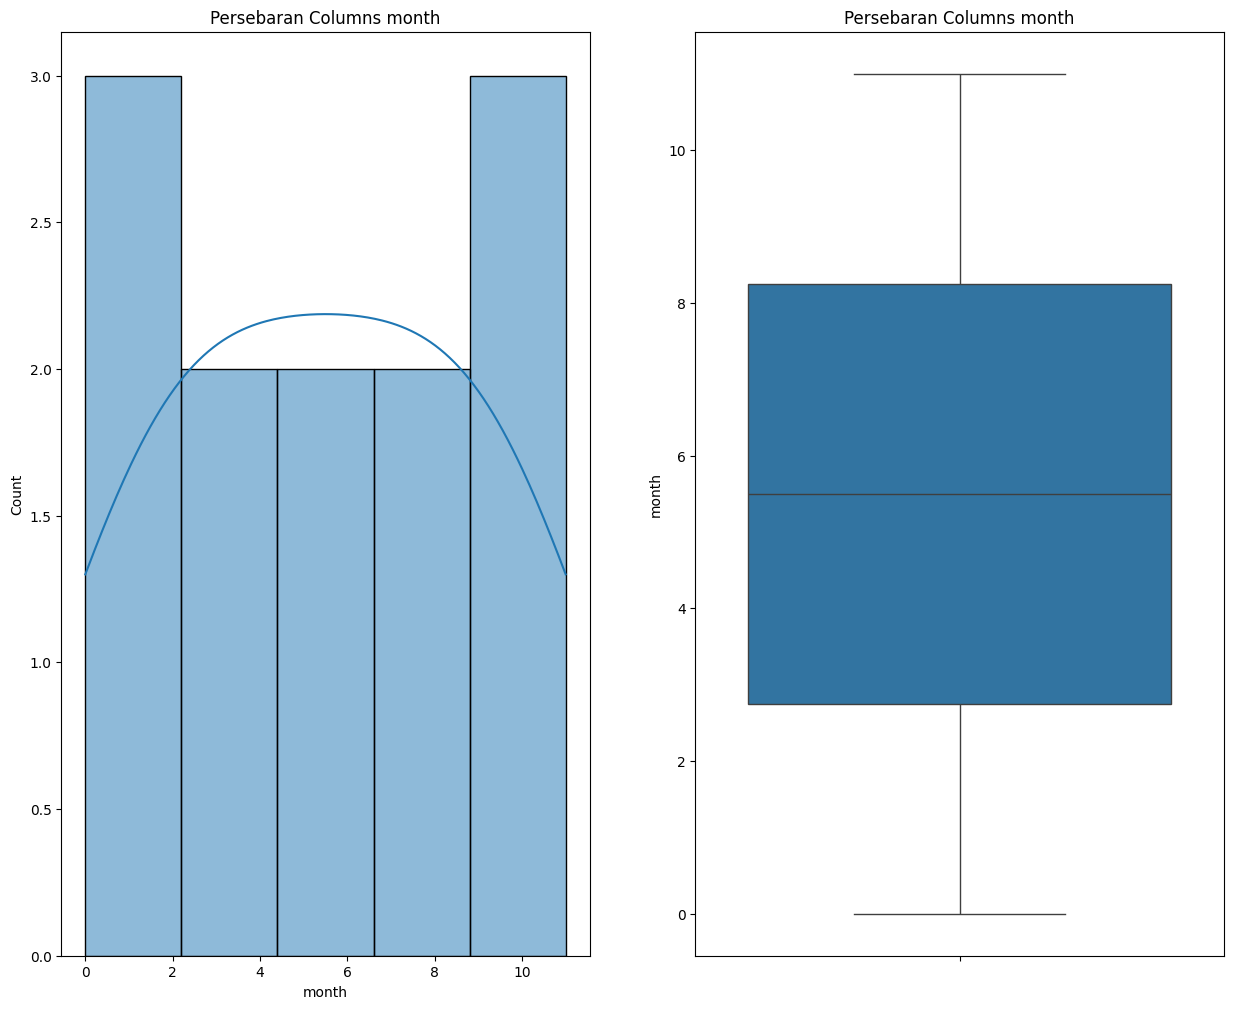

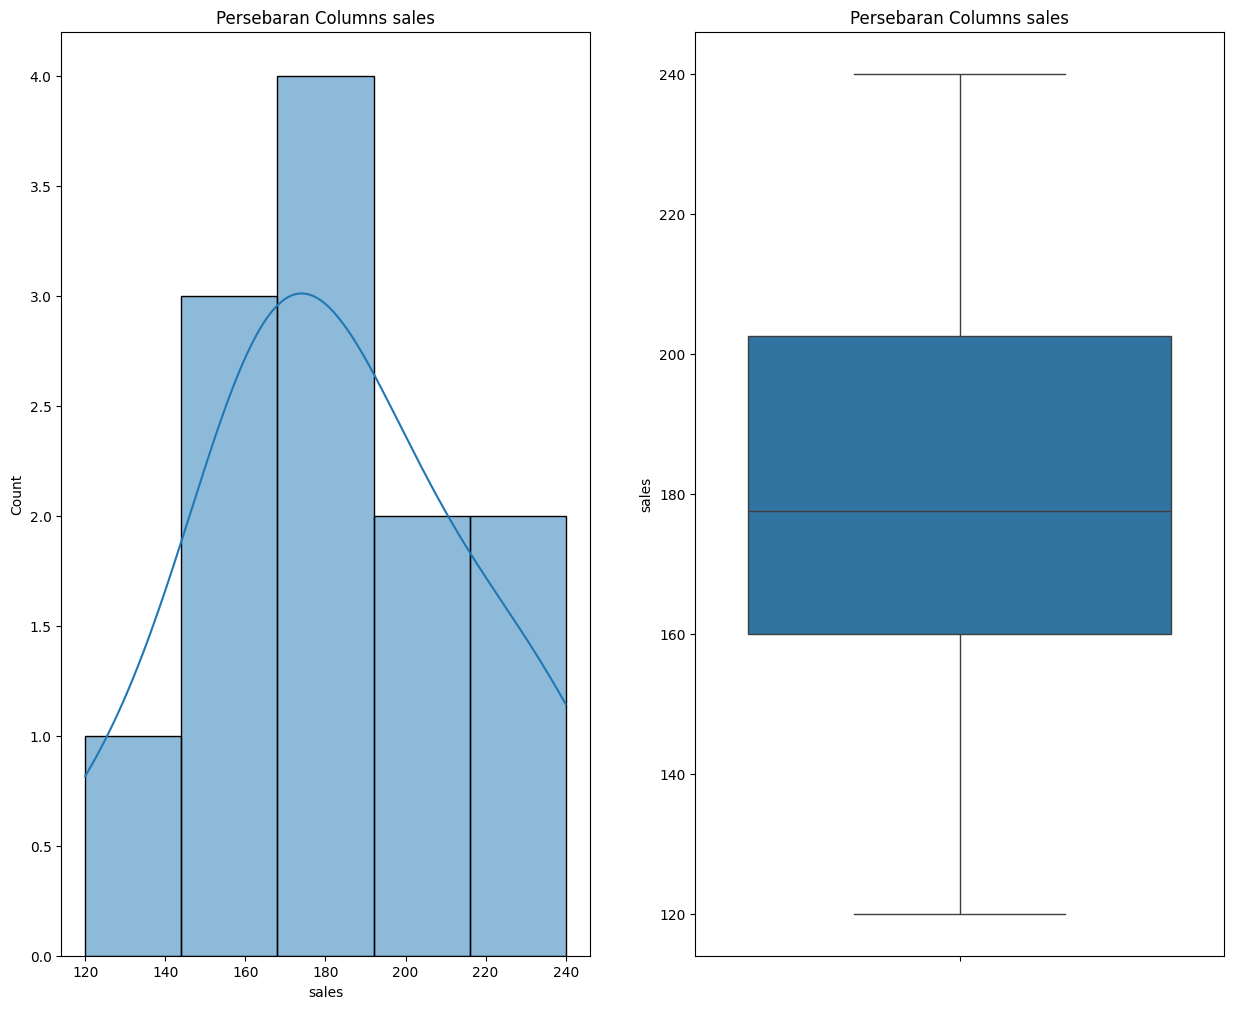

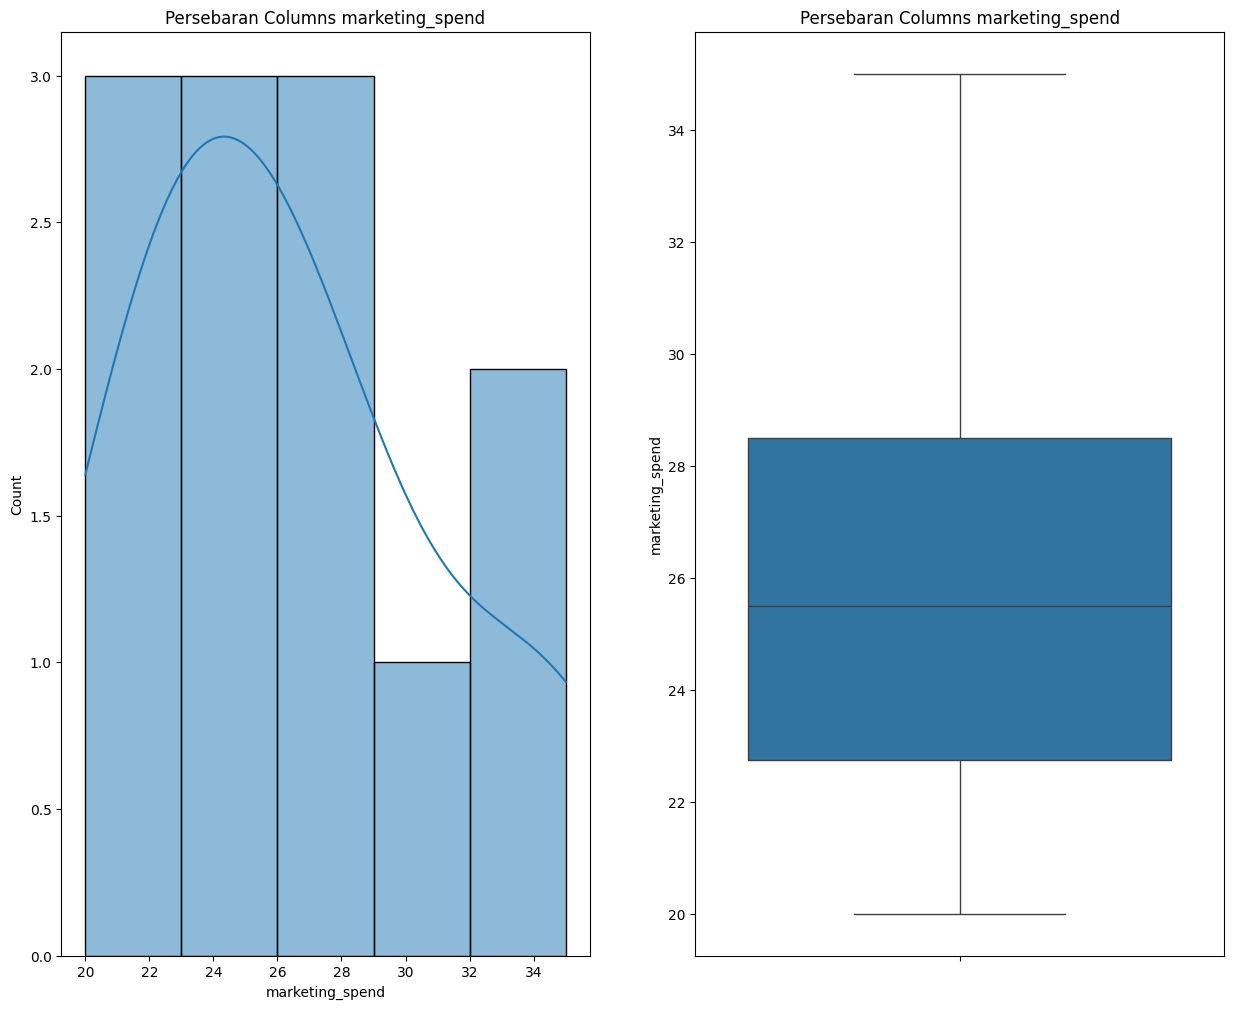

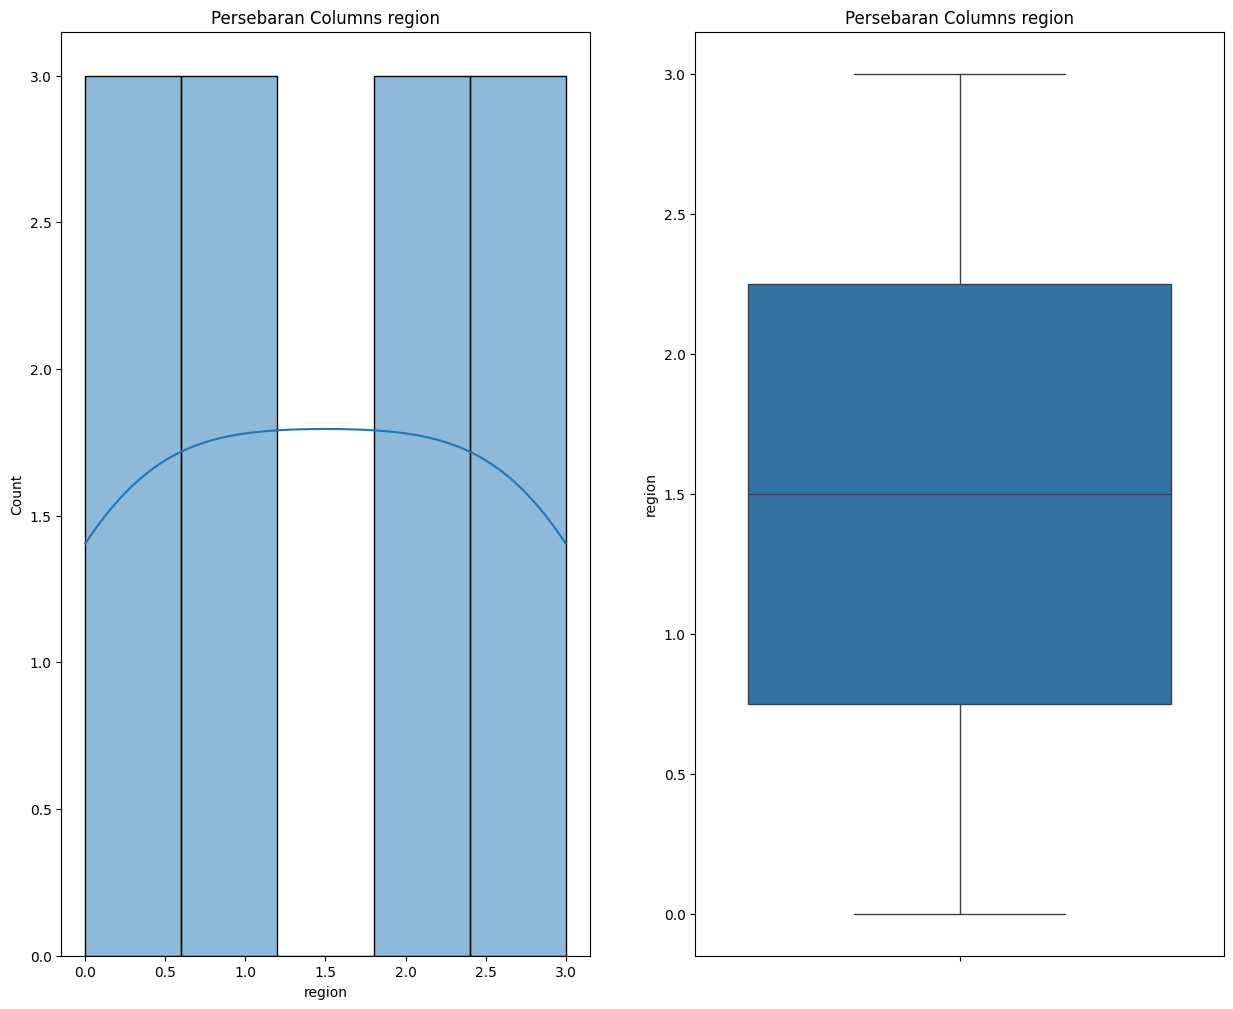

In [107]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(15, 12))
    sns.histplot(df[col], kde=True, ax = axes[0])
    axes[0].set_title(f"Persebaran Columns {col}")
    
    sns.boxplot(df[col], ax = axes[1])
    axes[1].set_title(f"Persebaran Columns {col}")
   

In [108]:
df.skew()

month              0.000000
sales              0.098946
marketing_spend    0.705665
region             0.000000
dtype: float64

### A.9 Analisis Korelasi

In [109]:
num = df.select_dtypes(include='number')

<Axes: >

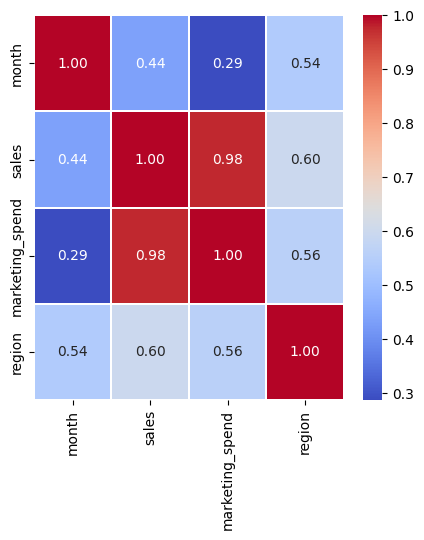

In [110]:
plt.figure(figsize=(5,5))
sns.heatmap(num.corr(),
            annot=True,
            fmt='.2f',
            linewidths=1.1,
            cmap='coolwarm')

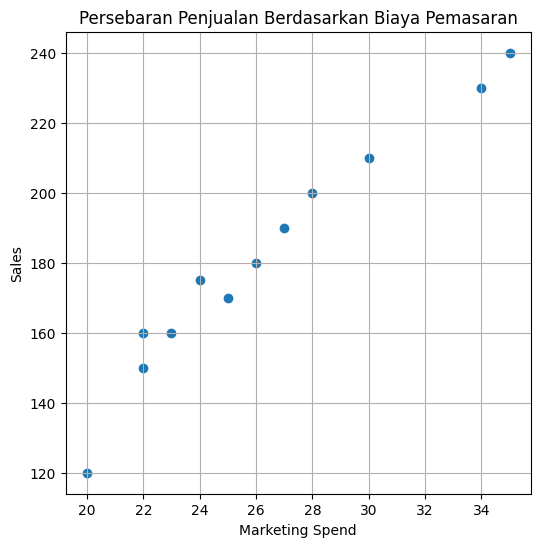

In [122]:
plt.figure(figsize=(6,6))
plt.scatter(df['marketing_spend'], df['sales'])
plt.title("Persebaran Penjualan Berdasarkan Biaya Pemasaran")
plt.xlabel("Marketing Spend")
plt.ylabel("Sales")
plt.grid()

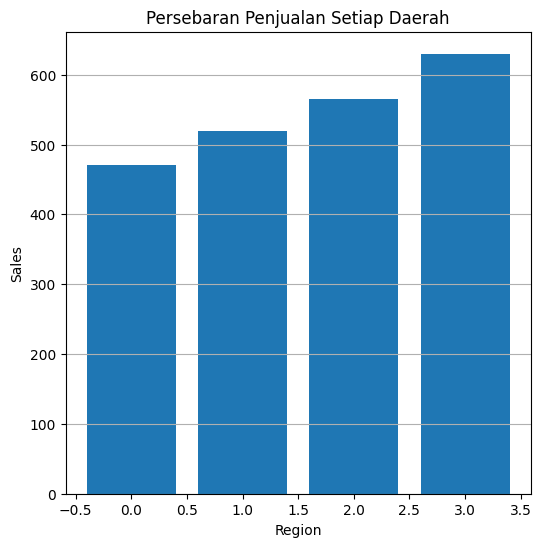

In [ ]:
region_sales = df.groupby("region")["sales"].sum()

plt.figure(figsize=(6,6))
plt.bar(region_sales.index, region_sales.values)
plt.title("Persebaran Penjualan Setiap Daerah")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.grid(axis='y')
plt.show()

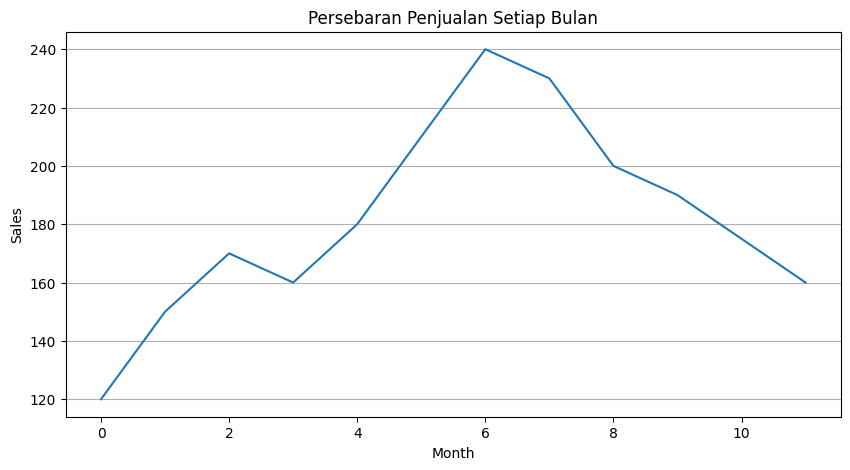

In [115]:
plt.figure(figsize=(10,5))
plt.plot(df["month"], df["sales"])
plt.title("Persebaran Penjualan Setiap Bulan")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(axis='y')
plt.show()

## Insight

- Pola = Penjualan tertinggi terletak di bulan Juli, dan setelah itu penjualan terus menurun, Region dengan total penjualan tertinggi yaitu West dan Region dengan total penjualan terendah yaitu North.
- Hubungan = Semakin gencar marketing_sales atau pemasaran, semakin tinggi juga penjualan yang didapat
- Hipotesis = Dapat memperbanyak pemasaran di Daerah/Region West agar penjualan meningkat jauh, karena penjualan di daerah West lebih efektif daripada daerah-daerah lain
